# **Evaluation**

Training Accuracy for Stacking: 1.0000
Testing Accuracy for Stacking: 0.9910

Classification Report for Stacking:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        87
           4       1.00      1.00      1.00        88
           5       1.00      0.92      0.96        86
           6       0.99      1.00      0.99        85
           7       1.00      1.00      1.00        87
           8       0.94      1.00      0.97        88

    accuracy                           0.99       780
   macro avg       0.99      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780



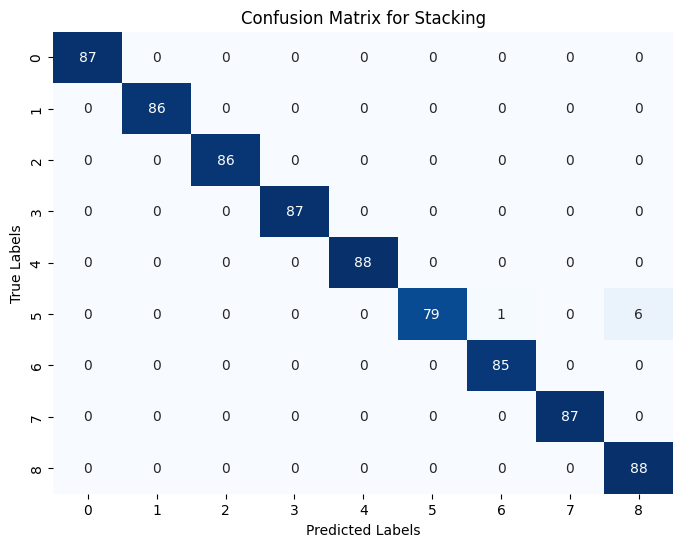

In [ ]:
# Build the final model
from sklearn.metrics import classification_report, accuracy_score

# Retrieve the best model
best_model = ensemble_methods[best_ensemble]

# Make predictions with the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate training accuracy
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy for {best_ensemble}: {train_accuracy:.4f}")

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy for {best_ensemble}: {test_accuracy:.4f}")

# Generate the classification report
report = classification_report(y_test, y_pred)
print(f"\nClassification Report for {best_ensemble}:")
print(report)

# Generate the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f'Confusion Matrix for {best_ensemble}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Save Model

In [ ]:
import os
import joblib

# Create the directory if it doesn't exist
os.makedirs("MODELS", exist_ok=True)

# Save the model
joblib.dump(best_model, "MODELS/best_ensemble_model.pkl")
print("Best model saved as 'MODELS/best_ensemble_model.pkl'")


Best model saved as 'MODELS/best_ensemble_model.pkl'


# Prediction Part

In [ ]:
import joblib

# Load the saved model
model = joblib.load('MODELS/best_ensemble_model.pkl')

# Define class mappings
condition_class = {
    0: "Subclinical (initial level)",
    1: "T3 toxic",
    2: "toxic goitre",
    3: "secondary toxic",
    4: "Subclinical (initial level)",
    5: "primary hypothyroid",
    6: "compensated hypothyroid",
    7: "secondary hypothyroid",
    8: "Negative"
}

disorder_class = {
    0: "hyperthyroid",
    1: "hyperthyroid",
    2: "hyperthyroid",
    3: "hyperthyroid",
    4: "hypothyroid",
    5: "hypothyroid",
    6: "hypothyroid",
    7: "hypothyroid",
    8: "Negative"
}

# Prediction Function
def prediction_func(input_features):
    input_array = np.array([input_features])

    # Make prediction
    prediction = model.predict(input_array)

    # Convert prediction to class label
    predicted_class = prediction[0]

    # Map the class label to disorder and condition
    predicted_disorder = disorder_class[predicted_class]
    predicted_condition = condition_class[predicted_class]

    print(f"Predicted Disorder: {predicted_disorder}")
    print(f"Predicted Condition: {predicted_condition}")

In [ ]:
# Sample input for hyperthyroid (Subclinical)
prediction_func([216.0,	0,1,	251.0,		0,	0.075,	0,	0.86,	0,	0])

Predicted Disorder: hyperthyroid
Predicted Condition: Subclinical (initial level)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Sample input for hyperthyroid (T3 toxic)
prediction_func([114.0,	0,	1,	126.0,	0,	0.02,	1,	0.91	,0	,0])

Predicted Disorder: hyperthyroid
Predicted Condition: T3 toxic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Sample input for hyperthyroid (toxic goitre)
prediction_func([130.0,	1,	1,	71.0,	1,	0.45,	0	,1.83,	0	,0])

Predicted Disorder: hyperthyroid
Predicted Condition: toxic goitre


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Sample input for hyperthyroid (secondary toxic)
prediction_func([274.304145874152,	0	,1,	256.9511094272748	,0	,23.870049902035092	,0	,1.10523516307462	,0,	0])

Predicted Disorder: hyperthyroid
Predicted Condition: secondary toxic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Sample input for hypothyroid (Subclinical)
prediction_func([16.0,	0,	0,	15.0,	0	,302.3842932322242,	0	,1.1,	0,	1])

Predicted Disorder: hypothyroid
Predicted Condition: Subclinical (initial level)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Sample input for hypothyroid (primary hypothyroid)
prediction_func([12.863603023708036,	0,	1,	12.818137364944047,	0	,217.18161814224823	,0,	1.0706832073454984	,0	,0])

Predicted Disorder: hypothyroid
Predicted Condition: primary hypothyroid


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Sample input for hypothyroid (compensated hypothyroid)
prediction_func([88.0	,0,	1,	89.0,	0	,8.0,	0,	0.99,	0,	0])

Predicted Disorder: hypothyroid
Predicted Condition: compensated hypothyroid


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Sample input for hypothyroid (secondary hypothyroid)
prediction_func([50.985014799031696,	0,	1,	56.985014799031696,	0,	0.12023002130720872	,0	,0.8899625369975792	,0	,0])

Predicted Disorder: hypothyroid
Predicted Condition: secondary hypothyroid


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Sample input for hypothyroid (secondary hypothyroid)
prediction_func([29.996665756167193	,0,	1,	23.39696361126294,	0	,22.930393424746534	,0,	0.9776159520125461	,0	,0])

Predicted Disorder: Negative
Predicted Condition: Negative


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# samples
X_test.head(50)

,TT4,tumor,TSH_measured,FTI,pregnant,TSH,query_hyperthyroid,T4U,on_antithyroid_meds,query_hypothyroid
2555,14.691105,0,1,38.858245,0,91.148653,0,1.035202,0,0
2503,44.016242,0,1,44.946328,0,57.271672,0,1.054205,0,0
511,198.000000,0,1,211.000000,0,0.100000,0,0.940000,0,0
986,128.919270,0,1,128.219726,0,0.028700,1,1.009596,0,0
1195,132.720318,1,1,83.133687,0,0.852612,0,1.593131,0,0
51,112.000000,0,1,103.000000,0,7.000000,0,1.080000,0,0
184,111.000000,0,1,101.000000,0,14.299999,0,1.100000,0,0
617,110.000000,0,1,121.000000,0,8.099999,0,0.910000,0,0
36,16.000000,0,0,15.000000,0,214.332943,0,1.100000,0,1
1046,121.186817,0,1,125.222922,0,0.057378,0,0.969639,0,0


In [ ]:
y_test.head(50)

,target
2555,8
2503,8
511,0
986,1
1195,2
51,6
184,6
617,6
36,4
1046,1
